<a href="https://colab.research.google.com/github/dehpour/dehpour.github.io/blob/main/magneto_thermal_leptogenesis_contour_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.special import kn
import scipy.integrate as inte 
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def program(M,B):
    """
    This set the model parameters
    """

    # R matrix Parameters
    # arXiv:2007.09150 [hep-ph]
    # according to eq. 5
    x1       = 180/180*np.pi
    y1       = 1.4/180*np.pi
    x2       = 180/180*np.pi
    y2       = 11.2/180*np.pi
    x3       = 180/180*np.pi
    y3       = 11/180*np.pi

    # Neutrino Masses Parameters
    m        = 1e-10      # GeV
    M1       = M     # GeV
    M2       = M*1e1     # GeV
    M3       = 0          # GeV
    ordering = 0            #0 is Normal Ordering and 1 is Inverse Orderiing

    #wave number
    k = 1e-7

    """
    initial conditions
    """
    B0 = B
    etaBLLeptogenesis0 = 0
    nN10 = 0
    etaQ10 = 0
    etaQ20 = 0
    etaQ30 = 0
    etaL10 = 0
    etaL20 = 0
    etaL30 = 0
    etau10 = 0
    etau20 = 0
    etau30 = 0
    etad10 = 0
    etad20 = 0
    etad30 = 0
    etae10 = 0
    etae20 = 0
    etae30 = 0
    etaphi0 = 0

    """
    Set global constants here.
    """

    TEW   = 100              #GeV
    tEW   = 0.0356*10**19/TEW**2        #1/GeV
    gstar = 106.75
    Mpl   = 2.43 * 10**(18)  #GeV

    #Higgs vev, mass and Z-mass in GeV
    v = 174                   #GeV

    # PMNS Parameters
    # arXiv:2007.14792, www.nu-fit.org

    delta               = 217/180*np.pi
    a                   = 0/180*np.pi
    b                   = 0/180*np.pi
    theta12             = 33.44/180*np.pi
    theta23             = 49.2/180*np.pi
    theta13             = 8.57/180*np.pi

    # Mass-splittings, all in GeV^2
    msplit2_solar       = 7.42e-5*1e-18
    msplit2_athm_normal = 2.515e-3*1e-18
    msplit2_athm_invert = 2.498e-3*1e-18

    Nc = 3
    Nw = 2

    alphay = 0.017
    alphaw = 0.033
    alphas = 0.11

    gammaw = 25 * alphaw**5
    gammas = 100 * alphas**5

    gammau = np.array([[1.1*1e-5,0,0],
            [0,7.1*1e-3,0],
            [0,0,0.94]])
    gammau = abs(gammau @ gammau)/(8*np.pi)

    gammad = np.array([[2.7*1e-5,6.3*1e-6,2.4*1e-7],
            [1.2*1e-4,5.4*1e-4,2.2*1e-5],
            [8.3*1e-5,9.8*1e-4,2.4*1e-2]])
    gammad = abs(gammad @ gammad)/(8*np.pi)

    gammae = np.array([[2.8*1e-6,0,0],
            [0,5.8*1e-4,0],
            [0,0,1*1e-2]])
    gammae = abs(gammae @ gammae)/(8*np.pi)

    YQ = 1/3
    YL = -1
    Yu = 4/3
    Yd = -2/3
    Ye = -2
    Yphi = 1

    assumptions = 'M1 =',M1,'GeV B0 =',B0,'Gauss k =',k

    """
    Orthogonal matrix R = R1.R2.R3
    """

    R1 = np.array([[1., 0., 0.],
                    [0.,  np.cos(x1+y1*1j), np.sin(x1+y1*1j)],
                    [0., -np.sin(x1+y1*1j), np.cos(x1+y1*1j)]], dtype=np.complex128)

    R2 = np.array([[ np.cos(x2+y2*1j), 0., np.sin(x2+y2*1j)],
                    [0., 1. , 0.],
                    [-np.sin(x2+y2*1j), 0., np.cos(x2+y2*1j)]], dtype=np.complex128)

    R3 = np.array([[ np.cos(x3+y3*1j), np.sin(x3+y3*1j), 0.],
                    [-np.sin(x3+y3*1j), np.cos(x3+y3*1j), 0.],
                    [0., 0., 1.]], dtype=np.complex128)

    R = R1 @ R2 @ R3
    #print(R)

    """
    Diagonal heavy mass matrix.
    """
    DM = np.array([[M1, 0., 0.],
                    [0., M2, 0.],
                    [0., 0., M3]], dtype=np.complex128)
    #print(DM)

    """
    Square root of diagonal heavy mass matrix.
    """

    SqrtDM = np.array([[np.sqrt(M1), 0., 0.],
                    [0., np.sqrt(M2), 0.],
                    [0., 0., np.sqrt(M3)]], dtype=np.complex128)

    #print(SqrtDM)

    """
    Square root of diagonal light mass matrix.
    Everything is in GeV.
    """

    if ordering==0:
        m11 = np.sqrt(m)
        m22 = np.sqrt(np.sqrt(msplit2_solar       + m*m))
        m33 = np.sqrt(np.sqrt(msplit2_athm_normal + m*m))
    elif ordering==1:
        m11 = np.sqrt(np.sqrt(msplit2_athm_invert + m*m - msplit2_solar))
        m22 = np.sqrt(np.sqrt(msplit2_athm_invert + m*m))
        m33 = np.sqrt(m)
    else:
        raise Exception("ordering %i not implemented"%ordering)

    SqrtDm = np.array([ [m11,  0.,  0.],
                    [ 0., m22,  0.],
                    [ 0.,  0., m33] ], dtype=np.complex128)
    #print(SqrtDm)

    """
    PMNS
    """

    # arXiv:2007.09150 [hep-ph]
    # according to eq. 4

    s12     = np.sin(theta12)
    s23     = np.sin(theta23)
    s13     = np.sin(theta13)
    c12     = np.power(1-s12*s12,0.5)
    c23     = np.power(1-s23*s23,0.5)
    c13     = np.power(1-s13*s13,0.5)
    U = np.array([ [c12*c13,c13*s12*np.exp(a*1j/2.), s13*np.exp(b*1j/2-delta*1j)],
                        [-c23*s12 - c12*np.exp(delta*1j)*s13*s23,np.exp((a*1j)/2.)*(c12*c23 - np.exp(delta*1j)*s12*s13*s23) , c13*np.exp((b*1j)/2.)*s23],
                        [-c12*c23*np.exp(delta*1j)*s13 + s12*s23,np.exp((a*1j)/2.)*(-c23*np.exp(delta*1j)*s12*s13 - c12*s23) ,c13*c23*np.exp((b*1j)/2.)]], dtype=np.complex128)

    #print(U)

    """
    Yukawa matrix, tree-level.
    """

    # arXiv:2007.09150 [hep-ph]
    # according to eq. 3

    h = (1./v)*(U @ SqrtDm @ np.transpose(R) @ SqrtDM)
    #Y = (1./v)*(U @ SqrtDm @ np.transpose(R) @ SqrtDM)

    #print(h)

    """
    Convenience wrapper for kn(1, x)
    """
    def my_kn1(x):
        return kn(1, x) if x<=600 else 1e-100#3. + 8.*x
    """
    Convenience wrapper for kn(2, x)
    """
    def my_kn2(x): 
        return kn(2, x) if x<=600 else 1e-100#15. + 8.*x

    """
    Decay rate of N1.
    """
    # arXiv:2007.09150 [hep-ph]
    # according to eq. 5
    Gamma1 = 2*(M1/(16*np.pi))*np.dot(np.conjugate(np.transpose(h)),h)[0,0]
    """
    Decay parameter 1
    """
    k1 = Gamma1/(M1**2/(2*0.0356*10**19))
    """
    Decay term for Boltzmann equation
    """
    #nemidonam chera tarif moadele 3 1112.4528 dorost ast ama fekr konam dar https://sci-hub.se/https://doi.org/10.1016/j.aop.2004.02.003 amade ast chera intor shode
    def D1(z):
        return  k1*z*my_kn1(z)/my_kn2(z)
    """
    Equilibrium number density with one decaying sterile.
    """
    def nN1Eq(z):
        n1 = 3./8.*(z**2)*my_kn2(z)
        n1 = np.complex128(n1)
        return n1
    """
    Washout parameter with one decaying sterile.
    """
    def W1(z):
        w1 = 1./4*(z**3)*k1*my_kn1(z)
        return w1

    """
    Help function in epsilon
    """
    def f(x):
        return np.sqrt(x) * (1 - (1 + x) * np.log((1 + x) / x))
    """
    CP asymmetry parameter for decays of N1.
    """
    epsilon1 = (1/(8 * np.pi)) * (((np.dot(np.conjugate(np.transpose(h)),h)[0,1])**2).imag / np.dot(np.conjugate(np.transpose(h)),h)[0,0]) * ((f(M2**2/M1**2) + (M1 * M2)/(M1**2 - M2**2))) \
            #+(1/(8 * np.pi)) * (((np.dot(np.conjugate(np.transpose(h)),h)[0,2])**2).imag / np.dot(np.conjugate(np.transpose(h)),h)[0,0]) * ((f(M3**2/M1**2) + (M1 * M3)/(M1**2 - M3**2))) \

    """
    ODEs of Model
    """

    #differential equations
    def funcs(z, u):
        B, etaBLLeptogenesis, nN1, etaQ1, etaQ2, etaQ3, etaL1, etaL2, etaL3, etau1, etau2, etau3, etad1, etad2, etad3, etae1, etae2, etae3, etaphi = u

        s = 2 * np.pi**2 * gstar * (M1/z)**3 / 45
        sigma = 100*(M1/z)

        conversion_x_to_z = np.sqrt(90/(np.pi**2 * gstar)) * Mpl/M1
        conversion_t_to_z = 2*tEW*TEW**2/(M1*(M1/z))

        etaB = (1/3) * ((etaQ1 + etau1 + etad1) + (etaQ2 + etau2 + etad2) + (etaQ3 + etau3 + etad3))
        CB = (6*s/np.pi**2) * (alphay/np.pi) * (etae1 - etaL1/2 + etae2 - etaL2/2 + etae3 - etaL3/2 + 3*etaB/8 + (3/2)*etaphi)

        dB = conversion_t_to_z * (-1/(tEW*TEW**2/(M1/z)**2) - (k*(M1/z))**2/sigma + CB*k*(M1/z)/sigma) * B
        
        detaBLLeptogenesis = (epsilon1).real*D1(z).real*(nN1-nN1Eq(z).real)-W1(z).real*etaBLLeptogenesis
        
        dnN1 = - D1(z).real*(nN1-nN1Eq(z).real)
        
        detaQ1 = conversion_x_to_z * (
                - Nc * gammaw * (etaQ1 + etaL1 + etaQ2 + etaL2 + etaQ3 + etaL3) \
                - Nw * gammas * (etaQ1 - etau1 - etad1 + etaQ2 - etau2 - etad2 + etaQ3 - etau3 - etad3) \
                - (gammau[0][0] * (etaQ1/6 + etaphi/2 - etau1/3)) - (gammau[0][1] * (etaQ1/6 + etaphi/2 - etau2/3)) - (gammau[0][2] * (etaQ1/6 + etaphi/2 - etau3/3)) \
                - (gammad[0][0] * (etaQ1/6 - etaphi/2 - etad1/3)) - (gammad[0][1] * (etaQ1/6 - etaphi/2 - etad2/3)) - (gammad[0][2] * (etaQ1/6 - etaphi/2 - etad3/3)) ) \
                - conversion_t_to_z *(YQ**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detaQ2 = conversion_x_to_z * (
                - Nc * gammaw * (etaQ1 + etaL1 + etaQ2 + etaL2 + etaQ3 + etaL3) \
                - Nw * gammas * (etaQ1 - etau1 - etad1 + etaQ2 - etau2 - etad2 + etaQ3 - etau3 - etad3) \
                - (gammau[1][0] * (etaQ2/6 + etaphi/2 - etau1/3)) - (gammau[1][1] * (etaQ2/6 + etaphi/2 - etau2/3)) - (gammau[1][2] * (etaQ2/6 + etaphi/2 - etau3/3)) \
                - (gammad[1][0] * (etaQ2/6 - etaphi/2 - etad1/3)) - (gammad[1][1] * (etaQ2/6 - etaphi/2 - etad2/3)) - (gammad[1][2] * (etaQ2/6 - etaphi/2 - etad3/3)) ) \
                - conversion_t_to_z *(YQ**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detaQ3 = conversion_x_to_z * (
                - Nc * gammaw * (etaQ1 + etaL1 + etaQ2 + etaL2 + etaQ3 + etaL3) \
                - Nw * gammas * (etaQ1 - etau1 - etad1 + etaQ2 - etau2 - etad2 + etaQ3 - etau3 - etad3) \
                - (gammau[2][0] * (etaQ3/6 + etaphi/2 - etau1/3)) - (gammau[2][1] * (etaQ3/6 + etaphi/2 - etau2/3)) - (gammau[2][2] * (etaQ3/6 + etaphi/2 - etau3/3)) \
                - (gammad[2][0] * (etaQ3/6 - etaphi/2 - etad1/3)) - (gammad[2][1] * (etaQ3/6 - etaphi/2 - etad2/3)) - (gammad[2][2] * (etaQ3/6 - etaphi/2 - etad3/3)) ) \
                - conversion_t_to_z *(YQ**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        
        detaL1 = conversion_x_to_z * (
                - gammaw * (etaQ1 + etaL1 + etaQ2 + etaL2 + etaQ3 + etaL3) \
                - (gammae[0][0] * (etaL1/2 - etaphi/2 - etae1)) - (gammae[0][1] * (etaL1/2 - etaphi/2 - etae2)) - (gammae[0][2] * (etaL1/2 - etaphi/2 - etae3)) ) \
                - (1/6) * ((epsilon1).real*D1(z).real*(nN1-nN1Eq(z).real)-W1(z).real*etaBLLeptogenesis) \
                - conversion_t_to_z *(YL**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detaL2 = conversion_x_to_z * (
                - gammaw * (etaQ1 + etaL1 + etaQ2 + etaL2 + etaQ3 + etaL3) \
                - (gammae[1][0] * (etaL2/2 - etaphi/2 - etae1)) - (gammae[1][1] * (etaL2/2 - etaphi/2 - etae2)) - (gammae[1][2] * (etaL2/2 - etaphi/2 - etae3)) ) \
                - (1/6) * ((epsilon1).real*D1(z).real*(nN1-nN1Eq(z).real)-W1(z).real*etaBLLeptogenesis) \
                - conversion_t_to_z *(YL**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detaL3 = conversion_x_to_z * (
                - gammaw * (etaQ1 + etaL1 + etaQ2 + etaL2 + etaQ3 + etaL3) \
                - (gammae[2][0] * (etaL3/2 - etaphi/2 - etae1)) - (gammae[2][1] * (etaL3/2 - etaphi/2 - etae2)) - (gammae[2][2] * (etaL3/2 - etaphi/2 - etae3)) ) \
                - (1/6) * ((epsilon1).real*D1(z).real*(nN1-nN1Eq(z).real)-W1(z).real*etaBLLeptogenesis) \
                - conversion_t_to_z *(YL**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        
        detau1 = conversion_x_to_z * (
                + gammas * (etaQ1 - etau1 - etad1 + etaQ2 - etau2 - etad2 + etaQ3 - etau3 - etad3) \
                + (gammau[0][0] * (etaQ1/6 + etaphi/2 - etau1/3)) + (gammau[1][0] * (etaQ2/6 + etaphi/2 - etau1/3)) + (gammau[2][0] * (etaQ3/6 + etaphi/2 - etau1/3)) ) \
                + conversion_t_to_z *(Yu**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detau2 = conversion_x_to_z * (
                + gammas * (etaQ1 - etau1 - etad1 + etaQ2 - etau2 - etad2 + etaQ3 - etau3 - etad3) \
                + (gammau[0][1] * (etaQ1/6 + etaphi/2 - etau2/3)) + (gammau[1][1] * (etaQ2/6 + etaphi/2 - etau2/3)) + (gammau[2][1] * (etaQ3/6 + etaphi/2 - etau2/3)) ) \
                + conversion_t_to_z *(Yu**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detau3 = conversion_x_to_z * (
                + gammas * (etaQ1 - etau1 - etad1 + etaQ2 - etau2 - etad2 + etaQ3 - etau3 - etad3) \
                + (gammau[0][2] * (etaQ1/6 + etaphi/2 - etau3/3)) + (gammau[1][2] * (etaQ2/6 + etaphi/2 - etau3/3)) + (gammau[2][2] * (etaQ3/6 + etaphi/2 - etau3/3)) ) \
                + conversion_t_to_z *(Yu**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        
        detad1 = conversion_x_to_z * (
                + gammas * (etaQ1 - etau1 - etad1 + etaQ2 - etau2 - etad2 + etaQ3 - etau3 - etad3) \
                + (gammad[0][0] * (etaQ1/6 - etaphi/2 - etad1/3)) + (gammad[1][0] * (etaQ2/6 - etaphi/2 - etad1/3)) + (gammad[2][0] * (etaQ3/6 - etaphi/2 - etad1/3)) ) \
                + conversion_t_to_z *(Yd**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detad2 = conversion_x_to_z * (
                + gammas * (etaQ1 - etau1 - etad1 + etaQ2 - etau2 - etad2 + etaQ3 - etau3 - etad3) \
                + (gammad[0][1] * (etaQ1/6 - etaphi/2 - etad2/3)) + (gammad[1][1] * (etaQ2/6 - etaphi/2 - etad2/3)) + (gammad[2][1] * (etaQ3/6 - etaphi/2 - etad2/3)) ) \
                + conversion_t_to_z *(Yd**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detad3 = conversion_x_to_z * (
                + gammas * (etaQ1 - etau1 - etad1 + etaQ2 - etau2 - etad2 + etaQ3 - etau3 - etad3) \
                + (gammad[0][2] * (etaQ1/6 - etaphi/2 - etad3/3)) + (gammad[1][2] * (etaQ2/6 - etaphi/2 - etad3/3)) + (gammad[2][2] * (etaQ3/6 - etaphi/2 - etad3/3)) ) \
                + conversion_t_to_z *(Yd**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        
        detae1 = conversion_x_to_z * (
                + (gammae[0][0] * (etaL1/2 - etaphi/2 - etae1)) + (gammae[1][0] * (etaL2/2 - etaphi/2 - etae1)) + (gammae[2][0] * (etaL3/2 - etaphi/2 - etae1)) ) \
                + conversion_t_to_z *(Ye**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detae2 = conversion_x_to_z * (
                + (gammae[0][1] * (etaL1/2 - etaphi/2 - etae2)) + (gammae[1][1] * (etaL2/2 - etaphi/2 - etae2)) + (gammae[2][1] * (etaL3/2 - etaphi/2 - etae2)) ) \
                + conversion_t_to_z *(Ye**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        detae3 = conversion_x_to_z * (
                + (gammae[0][2] * (etaL1/2 - etaphi/2 - etae3)) + (gammae[1][2] * (etaL2/2 - etaphi/2 - etae3)) + (gammae[2][2] * (etaL3/2 - etaphi/2 - etae3)) ) \
                + conversion_t_to_z *(Ye**2 * alphay / (4 * np.pi * s)) * (B**2/(0.25*10**40))/100 * (k - (CB/(M1/z)))
        
        detaphi = conversion_x_to_z * (
                - (gammau[0][0] * (etaQ1/6 + etaphi/2 - etau1/3)) - (gammau[0][1] * (etaQ1/6 + etaphi/2 - etau2/3)) - (gammau[0][2] * (etaQ1/6 + etaphi/2 - etau3/3)) \
                - (gammau[1][0] * (etaQ2/6 + etaphi/2 - etau1/3)) - (gammau[1][1] * (etaQ2/6 + etaphi/2 - etau2/3)) - (gammau[1][2] * (etaQ2/6 + etaphi/2 - etau3/3)) \
                - (gammau[2][0] * (etaQ3/6 + etaphi/2 - etau1/3)) - (gammau[2][1] * (etaQ3/6 + etaphi/2 - etau2/3)) - (gammau[2][2] * (etaQ3/6 + etaphi/2 - etau3/3)) \
                + (gammad[0][0] * (etaQ1/6 - etaphi/2 - etad1/3)) + (gammad[0][1] * (etaQ1/6 - etaphi/2 - etad2/3)) + (gammad[0][2] * (etaQ1/6 - etaphi/2 - etad3/3)) \
                + (gammad[1][0] * (etaQ2/6 - etaphi/2 - etad1/3)) + (gammad[1][1] * (etaQ2/6 - etaphi/2 - etad2/3)) + (gammad[1][2] * (etaQ2/6 - etaphi/2 - etad3/3)) \
                + (gammad[2][0] * (etaQ3/6 - etaphi/2 - etad1/3)) + (gammad[2][1] * (etaQ3/6 - etaphi/2 - etad2/3)) + (gammad[2][2] * (etaQ3/6 - etaphi/2 - etad3/3)) \
                + (gammae[0][0] * (etaL1/2 - etaphi/2 - etae1)) + (gammae[0][1] * (etaL1/2 - etaphi/2 - etae2)) + (gammae[0][2] * (etaL1/2 - etaphi/2 - etae3)) \
                + (gammae[1][0] * (etaL2/2 - etaphi/2 - etae1)) + (gammae[1][1] * (etaL2/2 - etaphi/2 - etae2)) + (gammae[1][2] * (etaL2/2 - etaphi/2 - etae3)) \
                + (gammae[2][0] * (etaL3/2 - etaphi/2 - etae1)) + (gammae[2][1] * (etaL3/2 - etaphi/2 - etae2)) + (gammae[2][2] * (etaL3/2 - etaphi/2 - etae3)) ) \
                - (1/2) * ((epsilon1).real*D1(z).real*(nN1-nN1Eq(z).real)-W1(z).real*etaBLLeptogenesis) \
        
        return dB,detaBLLeptogenesis, dnN1, detaQ1, detaQ2, detaQ3, detaL1, detaL2, detaL3, detau1, detau2, detau3, detad1, detad2, detad3, detae1, detae2, detae3, detaphi

    u0 = [B0, etaBLLeptogenesis0, nN10, etaQ10, etaQ20, etaQ30, etaL10, etaL20, etaL30, etau10, etau20, etau30, etad10, etad20, etad30, etae10, etae20, etae30, etaphi0]

    sol = inte.solve_ivp(fun=funcs,t_span=(0.1,M1/100),y0=u0,method='LSODA',rtol=5e-8,atol=1e-40) 

    B, etaBLLeptogenesis, nN1, etaQ1, etaQ2, etaQ3, etaL1, etaL2, etaL3, etau1, etau2, etau3, etad1, etad2, etad3, etae1, etae2, etae3, etaphi = sol.y
    z=sol.t

    #sol

    """
    Magneto Thermal Leptogenesis equilibrium conditions
    """
    etaB = (1/3) * ((etaQ1 + etau1 + etad1) + (etaQ2 + etau2 + etad2) + (etaQ3 + etau3 + etad3))
    etaL = 2*etaL1 + etae1 + 2*etaL2 + etae2 + 2*etaL3 + etae3
    etaBL = etaB - etaL

    """
    Thermal Leptogenesis equilibrium conditions
    """
    etaLLeptogenesis = -7/79 * etaBLLeptogenesis
    etaBLeptogenesis = -4 * etaLLeptogenesis
    etaLTotalLeptogenesis = 51/7 * etaLLeptogenesis
    etaQLeptogenesis = -1/3 * etaLLeptogenesis
    etauLeptogenesis = 5/21 * etaLLeptogenesis
    etadLeptogenesis = -19/21 * etaLLeptogenesis
    etaeLeptogenesis = 3/7 * etaLLeptogenesis
    etaphiLeptogenesis = 4/7 * etaLLeptogenesis
    
    return abs(etaB[len(z)-1])

In [3]:
Bmatrix=[1e23,1e24,1e25,1e26,1e27,1e28,1e29,1e30]
Mmatrix=[1e4,5e4,1e5,5e5,1e6,5e6,1e7,5e7]
X, Y = np.meshgrid(Bmatrix, Mmatrix)
yalanan=[]
Asymatrix=[]
for i in Mmatrix:
  for j in Bmatrix:
    yalanan.append(program(i,j))
  Asymatrix.append(yalanan)
  yalanan=[]

print(Asymatrix)

/usr/local/lib/python3.8/dist-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Repeated error test failures (internal error).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


[[1.0235917756302191e-11, 1.0714928237865116e-09, 1.0714915119479667e-07, 1.0714923923087122e-05, 0.0010714914704462691, 0.10714918755867897, 2.0874311578751825e-18, 1071.4896636001922], [1.2839887972370014e-14, 1.3233148629952767e-12, 1.7143903445193106e-10, 1.714387941869445e-08, 1.7143879079994954e-06, 0.00017143886638616368, 0.017143882883537943, 1.7143875660905954], [7.822839655385782e-16, 8.042320290034966e-14, 9.61347227733975e-12, 1.0714938021036177e-09, 1.0714933051950752e-07, 1.0714921228667597e-05, 0.0010714910233473249, 0.10714920555432408], [6.897689505702245e-17, 6.120187646484161e-16, 1.2456936101467785e-14, 1.320483289622129e-12, 1.7143942532360066e-10, 1.7143862579416752e-08, 1.7143861084694947e-06, 0.0001714386889623553], [3.191976168403279e-16, 3.565828987830312e-16, 4.821264088522039e-16, 8.086634341032928e-14, 9.806003307535164e-12, 1.0714936930769474e-09, 1.0714931759355027e-07, 1.2787347608206878e-15], [1.7458148680103263e-15, 1.7454020385655073e-15, 1.7464389825

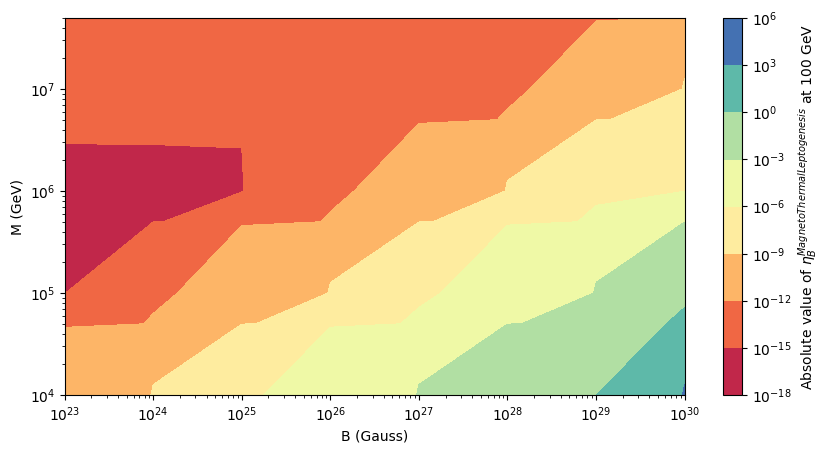

In [4]:
fig, ax = plt.subplots(figsize=(10, 5),dpi=100)
cs = ax.contourf(X, Y, Asymatrix, locator=ticker.LogLocator(), cmap=cm.Spectral)

cbar = fig.colorbar(cs)
cbar.set_label('Absolute value of $\eta_{B}^{Magneto Thermal Leptogenesis}$ at 100 GeV')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('B (Gauss)')
plt.ylabel('M (GeV)')
plt.show()